
Advanced Machine Learning

Automl : TPOT dan PyCaret

Ipynb link : https://colab.research.google.com/drive/13cprd3_3fhTpQgXc4HsYM2VbU25fXyi9?usp=sharing

Team Members:

Marcel Binggi Antonio Tobing ( 1301210349 )

Farhan Abdullah Yunus ( 1301213365 )

I Putu Sri Randha Yoga ( 1301213120 )

Annisa Izzatul Latifa ( 1301213328 )

##Problem Formulation

**Problem Definition:**  
Diabetes is a chronic disease affecting millions of people, leading to various serious complications. The National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) has compiled the Pima Indians Diabetes dataset, which contains medical data of women of Pima Indian heritage. This project aims to build a machine learning model using AutoML tools like TPOT and PyCaret to predict diabetes, assisting in early detection and more effective disease management.

**Problem Analysis:**  
**Understanding the Data:** The project aims to predict diabetes using medical features such as pregnancies, glucose levels, blood pressure, skin thickness, insulin, BMI, pedigree function, age, and diabetes outcome (1 or 0).  
**Data Preparation:** This includes visualizing correlations with heatmaps and scatter plots, and splitting the data for training and testing.  
**Modeling:** AutoML tools (TPOT and PyCaret) are used to identify the best model.  
**Evaluation:** The model is evaluated using metrics like accuracy, precision, recall, F1-score, and AUC-ROC, with a comparison of models from TPOT and PyCaret.

# Install dan Import Library TPOT

In [ ]:
# restart session after run this cell
# library installation
!pip install openml
!pip install tpot
!pip install pycaret

In [ ]:
# import library
from sklearn.model_selection import train_test_split
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Exploration and Data Splitting

**Data Exploration**

**Heatmap:**  
Shows the correlation between features, such as glucose and diabetes (positive correlation), and age and blood pressure (negative correlation).

**Scatter Plot:**  
Identifies relationships between variables, outliers, and distribution patterns, highlighting the strong relationship between glucose levels and diabetes.

**Split Data**

The data is split into 75% for training and 25% for testing, ensuring effective training and fair evaluation.

In [ ]:
# Download dataset
dataset = openml.datasets.get_dataset(43582)

<ipython-input-3-bdaf568b2794>:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(43582)


In [ ]:
dataset

OpenML Dataset
Name..........: Pima-Indians-Diabetes
Version.......: 1
Format........: arff
Upload Date...: 2022-03-24 00:09:38
Licence.......: CC0: Public Domain
Download URL..: https://api.openml.org/data/v1/download/22102407/Pima-Indians-Diabetes.arff
OpenML URL....: https://www.openml.org/d/43582
# of features.: 9
# of instances: 768

In [ ]:
# Load dataset
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
df = pd.concat([X, y], axis=1)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


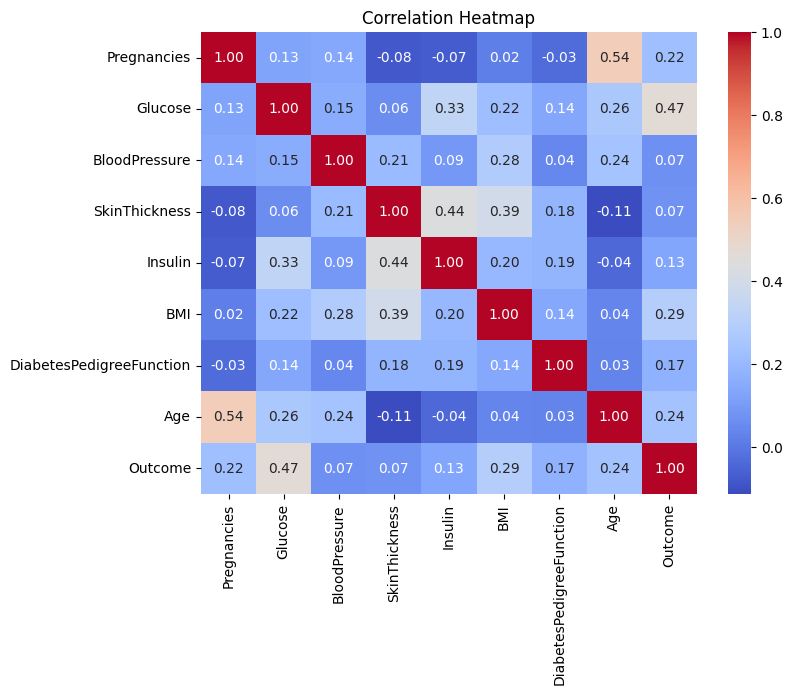

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

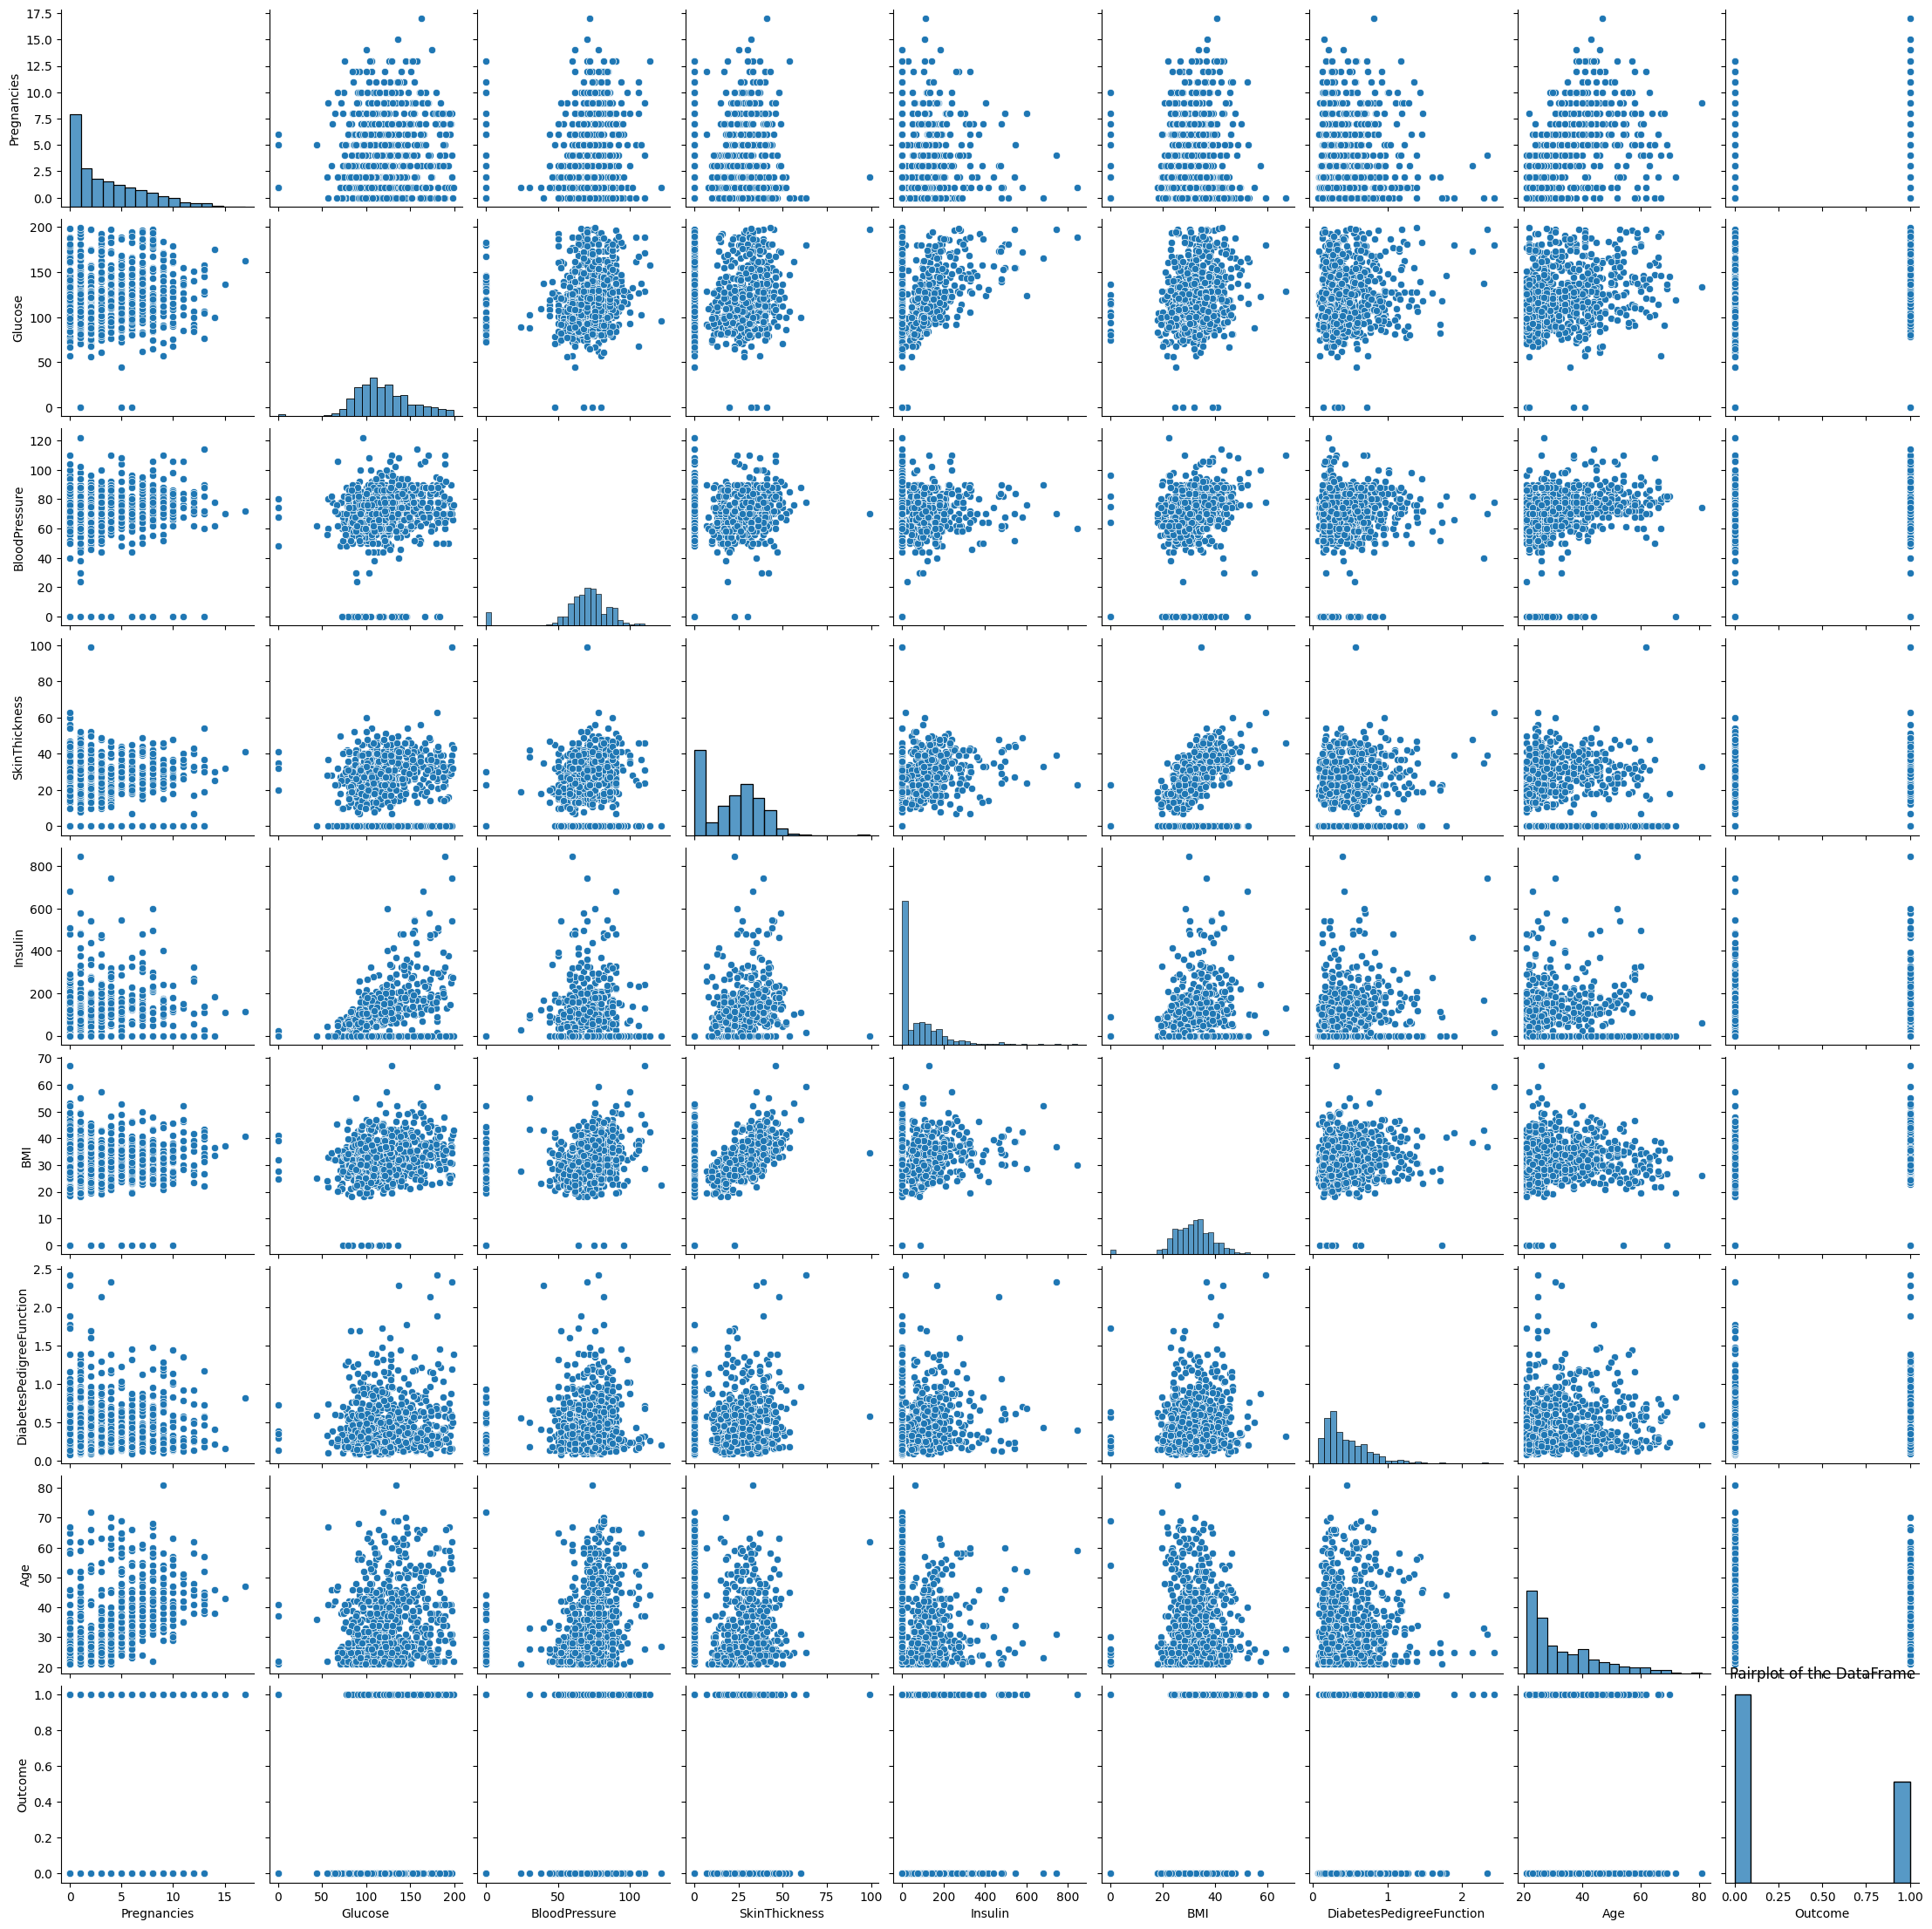

In [ ]:
# Scatter plot
sns.pairplot(df)
plt.title("Pairplot of the DataFrame")
plt.show()

In [ ]:
random_state = 22 # seed

# Split dataset
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
    y, train_size=0.75, test_size=0.25, random_state=random_state)

# MODELLING

## TPOT

TPOT (Tree-based Pipeline Optimization Tool) is a genetic-based AutoML tool that automates the process of selecting and optimizing machine learning pipelines. TPOT uses genetic algorithms to optimize the combination of models and hyperparameters, and it can generate an optimal machine learning pipeline with minimal human intervention. The advantages of TPOT include its ability to explore a wide range of models and its flexibility in using various types of algorithms. Here are the steps involved in using TPOT:


1. **Data Cleaning:**  
   Handle missing values, outliers, and anomalies.

2. **Feature Preprocessing:**  
   Normalize, standardize, and encode categorical variables.

3. **Feature Selection:**  
   Select relevant features to improve model performance.

4. **Feature Construction:**  
   Create new features from existing data.

5. **Model Selection:**  
   Choose the most suitable machine learning model.

6. **Parameter Optimization:**  
   Tune hyperparameters for optimal performance.

7. **Model Validation:**  
   Validate the model on unseen data.

Model

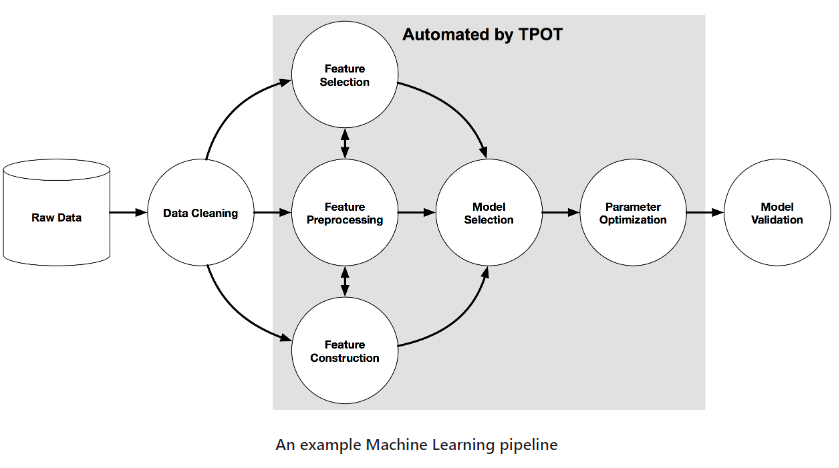

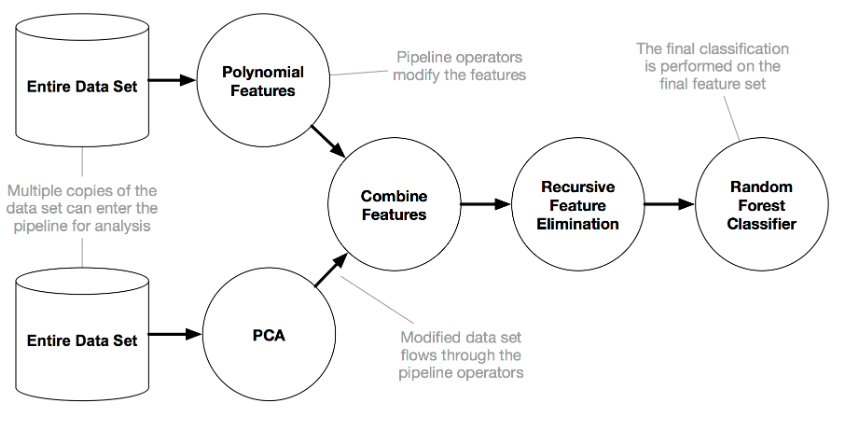

Experiment


1. **Initialize TPOTClassifier:**  
   Set parameters (generations = 10, population = 30, verbosity = 2).

2. **Train Model:**  
   Train the model on the training dataset and calculate accuracy on the testing dataset.

3. **Export Best Pipeline:**  
   Export the best pipeline to a Python file.

4. **Read and Execute Pipeline:**  
   Import and initialize the best pipeline from the exported file.

5. **Retrain and Predict:**  
   Set the random_state, retrain the pipeline, and make predictions on the testing dataset.

6. **Evaluate Model:**  
   Create a confusion matrix and calculate metrics (accuracy, precision, recall, specificity, F1-score) for model performance evaluation.

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, random_state=random_state) # klasifikasi menggunakan teapot
tpot.fit(X_train, y_train) # training
print(tpot.score(X_test, y_test)) # score TPOT
tpot.export('tpot_pima_pipeline.py')

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7881559220389804

Generation 2 - Current best internal CV score: 0.7881559220389804

Generation 3 - Current best internal CV score: 0.7881559220389804

Generation 4 - Current best internal CV score: 0.7898650674662668

Generation 5 - Current best internal CV score: 0.7898650674662668

Generation 6 - Current best internal CV score: 0.7898650674662668

Generation 7 - Current best internal CV score: 0.7898650674662668

Generation 8 - Current best internal CV score: 0.7898650674662668

Generation 9 - Current best internal CV score: 0.7933433283358322

Generation 10 - Current best internal CV score: 0.7985457271364318

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=11, min_samples_split=9, n_estimators=100)
0.7395833333333334


In [ ]:
# Open result from the pipeline
with open('tpot_pima_pipeline.py') as f:
    code = f.read()

In [ ]:
print(code)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=22)

# Average CV score on the training set was: 0.7985457271364318
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.5, min_samples_leaf=11, min_samples_split=9, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 22)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [ ]:
# Proses hasil pipeline dari tpot berupa klasifikasi The process result of the teapot pipeline is classification
# Split string into lines
lines = code.strip().split('\n')

# import 'exported_pipeline'
pipeline = [line.strip() for line in lines if 'exported_pipeline =' in line][0]
exec(lines[2]) # import classifier
exec(lines[3]) # import classifier
exec(pipeline)
# Set random_state
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', random_state)
# Train classification model
exported_pipeline.fit(X_train, y_train)
# Classifiaction result for testing data
results = exported_pipeline.predict(X_test)

Evaluasi





In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

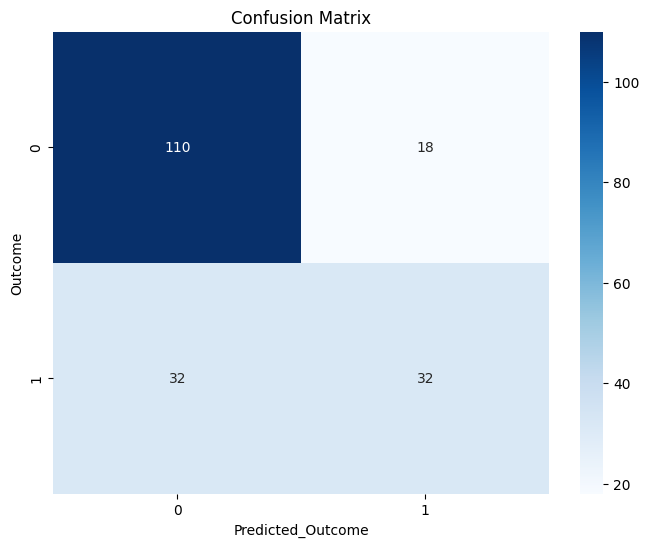

In [ ]:
# Confusion matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted_Outcome')
plt.ylabel('Outcome')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a DataFrame for visualization
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "Specificity", "F1-score"],
    "Value": [accuracy, precision, recall, specificity, f1_score]
}

df = pd.DataFrame(metrics)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Display the plot
plt.show()


Accuracy: 0.7395833333333334
Precision: 0.64
Recall: 0.5
Specificity: 0.859375
F1-score: 0.5614035087719298


## PyCaret

PyCaret is an AutoML library that provides a simple and intuitive user interface for building and deploying machine learning models. PyCaret supports a range of ML techniques and algorithms, and includes features for data preprocessing, model selection, hyperparameter tuning, and model evaluation. Here are the steps in PyCaret:

1. **Sourcing Training Dataset:**  
   Acquire datasets from various sources.

2. **Exploratory Data Analysis:**  
   Understand feature correlations, value distributions, and identify outliers.

3. **Pre-processing Dataset for ML:**  
   Handle imputation, normalization, feature splitting and merging, and manage outliers and data ranges.

4. **Compare Models:**  
   Compare models using evaluation metrics.

5. **Create Model:**  
   Select the best model based on evaluation.

6. **Tune Model:**  
   Optimize hyperparameters.

7. **Plot Model:**  
   Visualize errors, residuals, and feature importance.

8. **Evaluate Model:**  
   Perform further evaluation with additional metrics.

9. **Finalize Model:**  
   Finalize the best model.

10. **Save Model:**  
    Save the model for future use.

11. **Load Model:**  
    Load the saved model for further predictions.

12. **Deploy Model:**  
    Deploy the model to a production environment.

13. **Predict Model:**  
    Use the model to make predictions on new data.

Model

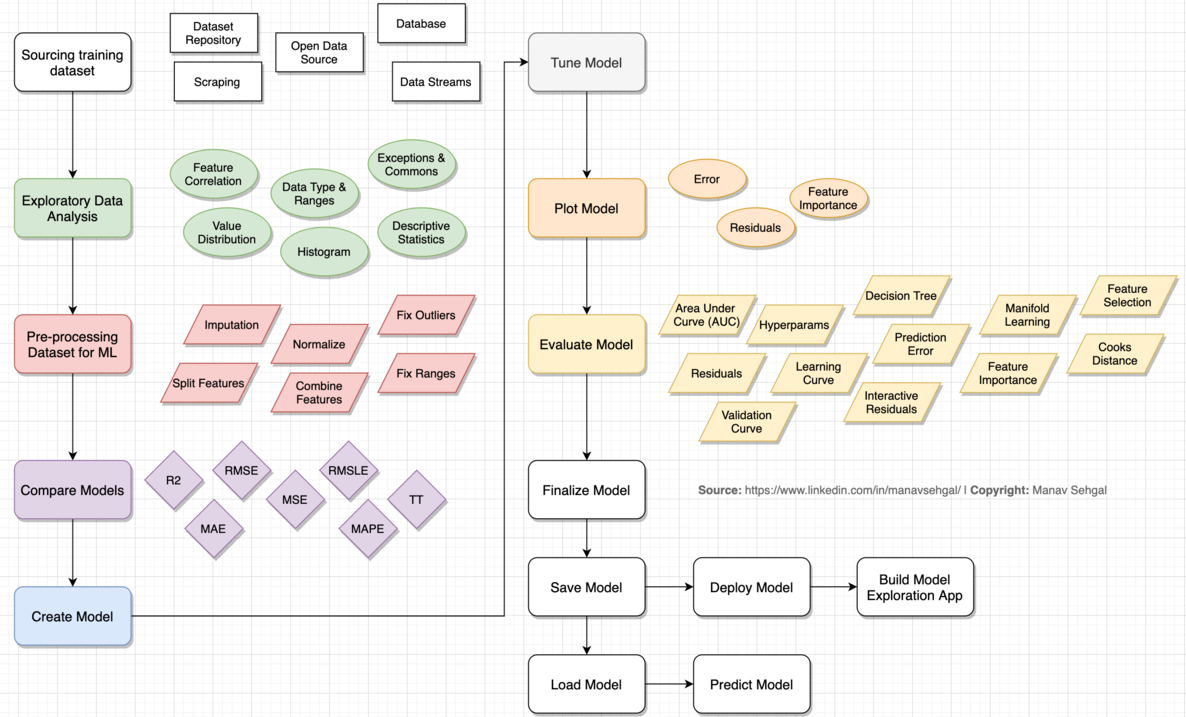

**Experiment**

**Initialization:**
- Import the PyCaret module.
- Create an instance of `ClassificationExperiment`.

**Setup:**
- Configure the dataset and target column.
- Set the `session_id`.

**Training and Model Selection:**
- Train and compare models.
- Select the best model.

**Prediction and Evaluation:**
- Make predictions on hold-out/test data.
- Evaluate the best model and display the results.

In [ ]:
# loading sample dataset
data = df

In [ ]:
# init setup
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# model training and selection
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.8240
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0340
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0340
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2390
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0330
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.2980
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.2480
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1970
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0550
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# predict on hold-out/test set
pred_holdout = s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [ ]:
pred_holdout

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244


Evaluation

In [ ]:
# evaluate trained model
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

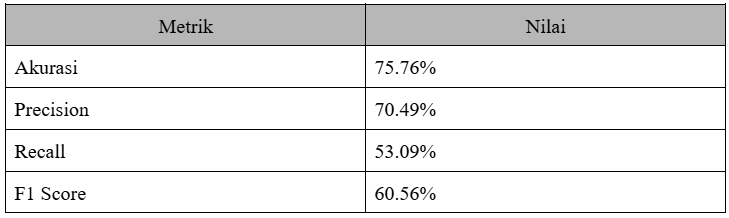

# Conclusion

**Comparison**

- **TPOT:**
  1. Initialize `TPOTClassifier` with specified parameters.
  2. Train the model on the training dataset.
  3. Export the best pipeline to a Python file.
  4. Read and execute the best pipeline.
  5. Retrain the best pipeline and make predictions on the test dataset.
  6. Evaluate the model using a confusion matrix and evaluation metrics.

- **PyCaret:**
  1. Initialize the `PyCaret` environment.
  2. Configure the experiment environment.
  3. Train multiple classification models and select the best model.
  4. Make predictions on the test dataset using the best model.
  5. Evaluate the best model with metrics and visualizations provided by PyCaret.
  6. Display the evaluation results.

RESULT

TPOT:

- Model: Random Forest
- Accuracy: 73.95%
- Precision: 64%
- Recall: 50%
- F1 Score: 56.14%

PyCaret:

- Model: Logistic Regression
- Accuracy: 75.76%
- Precision: 70.49%
- Recall: 53.09%
- F1 Score: 60.56%

PyCaret shows better perfomance accross all evaluation metrics compared to TPOT.

## Conclusion

- **General Conclusion:**

  In this experiment, we compared TPOT and PyCaret for predicting diabetes. PyCaret demonstrated superior performance by producing models with higher accuracy, precision, recall, and F1 score.

- **Lessons Learned:**
  AutoML reduces the time and effort required to build machine learning models. PyCaret proved to be more effective in this experiment.

- **Suggestions for Improvement:**
  Conduct further exploration with different and more complex datasets to evaluate the performance of TPOT and PyCaret more thoroughly.